In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '1-s2.0-S0957417422008065-mmc1.csv'
df = pd.read_csv(file_path)

In [ ]:
# Drop the label column if present
# In unsupervised learning, we don't use labels during training
if 'label' in df.columns:
    df = df.drop(columns=['label'])

In [ ]:
# Convert non-numeric columns to numeric if possible, otherwise drop them
# The Isolation Forest algorithm requires numerical data
for column in df.columns:
    try:
        # Attempt to convert the column to numeric
        df[column] = pd.to_numeric(df[column], errors='raise')
    except ValueError:
        # If conversion fails, drop the column
        df = df.drop(columns=[column])

In [ ]:
# Handling missing values
# Drop rows with missing values (alternative: fill missing values)
df = df.dropna()

In [ ]:
# Normalizing the data
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Isolation Forest model
# Isolation Forest is an algorithm particularly well-suited for anomaly detection
# It isolates observations by randomly selecting a feature and then randomly selecting a split value
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
# Predicting anomalies
# The model assigns each data point to either -1 (anomaly) or 1 (normal)
df['anomaly'] = model.predict(df_scaled)

In [ ]:
# Mapping -1 to 1 for anomaly and 1 to 0 for normal
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

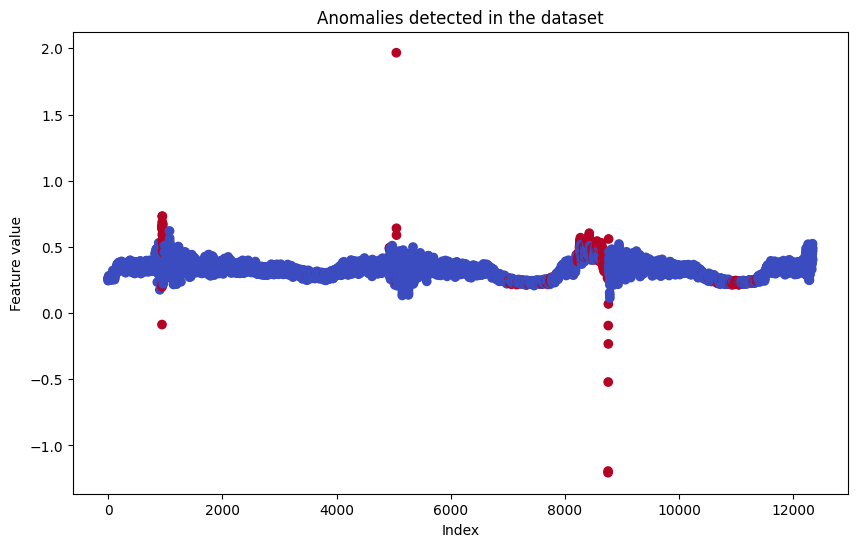

In [ ]:
# Plotting the results
# Visualize the anomalies in the dataset
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df.iloc[:, 0], c=df['anomaly'], cmap='coolwarm')
plt.title("Anomalies detected in the dataset")
plt.xlabel("Index")
plt.ylabel("Feature value")
plt.show()

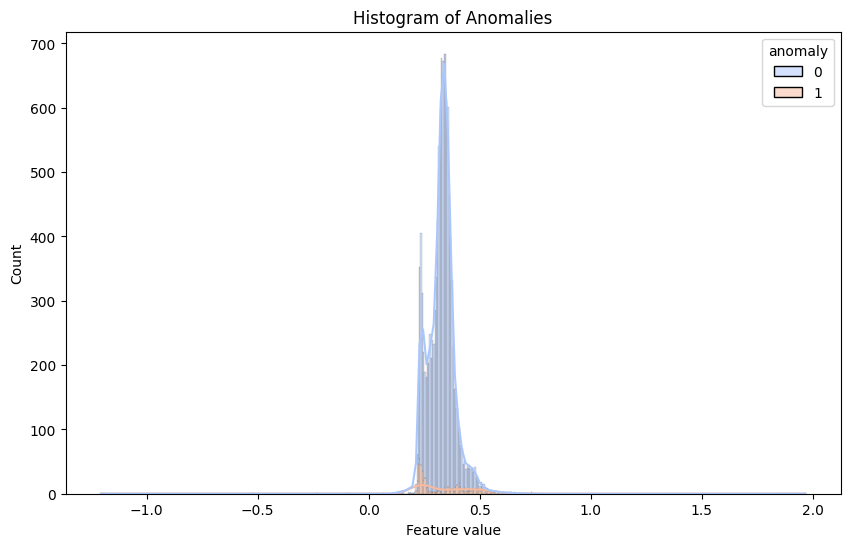

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df.columns[0], hue='anomaly', multiple='stack', palette='coolwarm', kde=True)
plt.title("Histogram of Anomalies")
plt.xlabel("Feature value")
plt.ylabel("Count")
plt.show()

In [ ]:
import csv

# Function to convert txt file to csv
def convert_txt_to_csv(txt_filename, csv_filename):
    with open(txt_filename, 'r') as txt_file, open(csv_filename, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        data_section = False
        headers = []
        data = []

        for line in txt_file:
            line = line.strip()

            if line.startswith('@attribute'):
                # Extracting the attribute names
                headers.append(line.split()[1])

            if line == '@data':
                data_section = True
                csv_writer.writerow(headers)
                continue

            if data_section and line:
                # Writing data rows to the csv
                csv_writer.writerow(line.split(','))

# Specify the input and output file names
txt_filename = 'Data Set 2.txt'
csv_filename = 'Data Set 2.csv'

# Convert the txt file to csv
convert_txt_to_csv(txt_filename, csv_filename)

Processing frame for timestamp: 2024-06-01 00:30:00
Processing frame for timestamp: 2024-06-01 00:30:00
Processing frame for timestamp: 2024-06-01 00:30:01
Processing frame for timestamp: 2024-06-01 00:30:02
Processing frame for timestamp: 2024-06-01 00:30:03
Processing frame for timestamp: 2024-06-01 00:30:04
Processing frame for timestamp: 2024-06-01 00:30:05
Processing frame for timestamp: 2024-06-01 00:30:06
Processing frame for timestamp: 2024-06-01 00:30:07
Processing frame for timestamp: 2024-06-01 00:30:08
Processing frame for timestamp: 2024-06-01 00:30:09
Processing frame for timestamp: 2024-06-01 00:30:10
Processing frame for timestamp: 2024-06-01 00:30:11
Processing frame for timestamp: 2024-06-01 00:30:12
Processing frame for timestamp: 2024-06-01 00:30:13
Processing frame for timestamp: 2024-06-01 00:30:14
Processing frame for timestamp: 2024-06-01 00:30:15
Processing frame for timestamp: 2024-06-01 00:30:16
Processing frame for timestamp: 2024-06-01 00:30:17
Processing f

Processing frame for timestamp: 2024-06-01 00:30:00


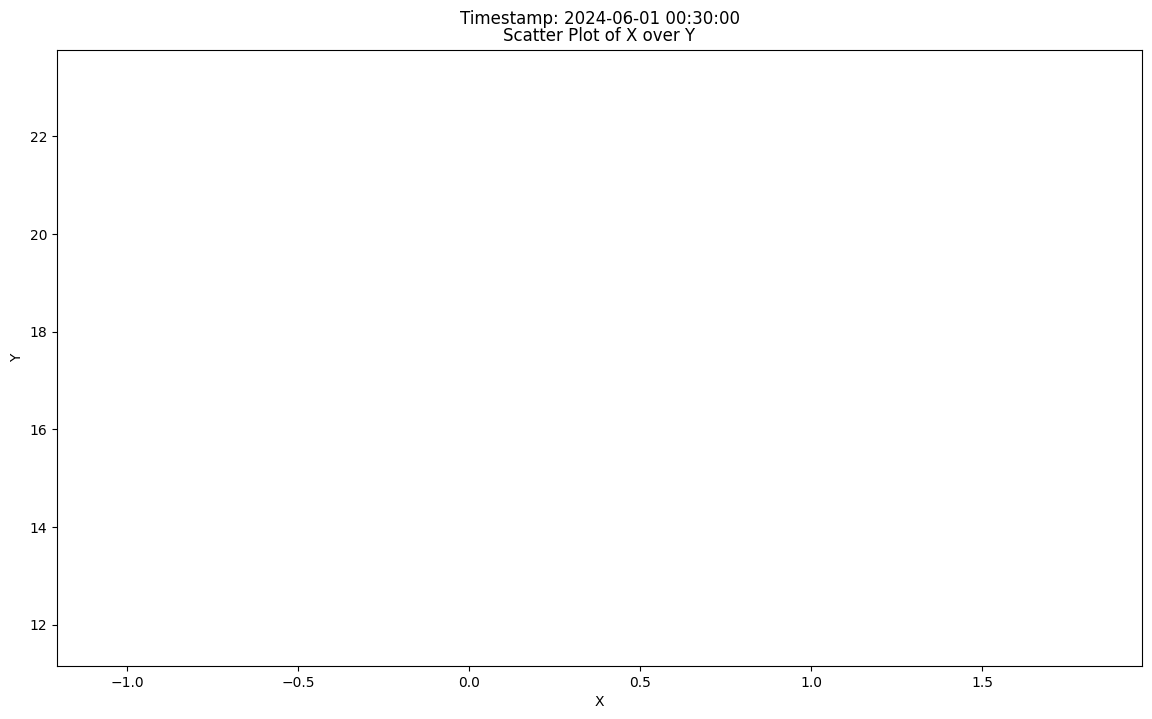

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import matplotlib.animation as animation
from IPython.display import HTML

# Assuming all your CSV files are in the same directory and follow a pattern like 'output_chunk_1.csv', 'output_chunk_2.csv', etc.
file_pattern = 'output_chunk_*.csv'

# Get a list of all matching files
csv_files = glob.glob(file_pattern)

# Initialize variables to find the global range of X and Y
global_min_x, global_max_x = float('inf'), float('-inf')
global_min_y, global_max_y = float('inf'), float('-inf')

# Dictionary to hold data from all files
data_dict = {}

# Loop through each CSV file to collect data and find the global min and max for X and Y
for file in csv_files:
    data = pd.read_csv(file)
    if 'X' in data.columns and 'Y' in data.columns:
        min_x, max_x = data['X'].min(), data['X'].max()
        min_y, max_y = data['Y'].min(), data['Y'].max()
        global_min_x = min(global_min_x, min_x)
        global_max_x = max(global_max_x, max_x)
        global_min_y = min(global_min_y, min_y)
        global_max_y = max(global_max_y, max_y)

        # Convert timestamp to datetime
        if 'timestamp' in data.columns:
            data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S', errors='coerce')

            # Remove rows with invalid timestamps
            data = data.dropna(subset=['timestamp'])

        data_dict[file] = data

# Define the range of timestamps to animate (inclusive)
start_timestamp = pd.Timestamp('2024-06-01 00:30:00')
end_timestamp = pd.Timestamp('2024-06-01 00:31:00')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(14, 8))

def update(timestamp):
    ax.clear()  # Clear previous scatter points

    # Print the current timestamp being processed
    print(f"Processing frame for timestamp: {timestamp}")

    # Combine data for the current timestamp from all files
    combined_data = pd.concat([data[data['timestamp'] == timestamp] for data in data_dict.values() if 'timestamp' in data.columns])

    # Plot the points, coloring based on the label
    if not combined_data.empty:
        if 'label' in combined_data.columns:
            scatter_0 = ax.scatter(combined_data[combined_data['label'] == 0]['X'], combined_data[combined_data['label'] == 0]['Y'], color='blue', label='Label 0', alpha=0.6)
            scatter_1 = ax.scatter(combined_data[combined_data['label'] == 1]['X'], combined_data[combined_data['label'] == 1]['Y'], color='red', label='Label 1', alpha=0.6)
        else:
            ax.scatter(combined_data['X'], combined_data['Y'], color='blue', alpha=0.6)

    # Adding labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Scatter Plot of X over Y')

    # Add timestamp text at the top of the plot
    ax.text(0.5, 1.05, f'Timestamp: {timestamp}', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    # Only add a legend if there are labeled points
    if 'label' in combined_data.columns and not combined_data.empty:
        ax.legend(loc='upper right')

    # Set the x and y axis limits to the global range
    ax.set_xlim(global_min_x, global_max_x)
    ax.set_ylim(global_min_y, global_max_y)

# Create the animation
frames = pd.date_range(start=start_timestamp, end=end_timestamp, freq='s')
ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False)

# Save the animation to an MP4 file
ani.save('animation.mp4', writer='ffmpeg', fps=1)

# Display the animation in the notebook
HTML(ani.to_jshtml())